# 포트폴리오 수익률 수정

In [119]:
import pandas as pd

In [120]:
코스피재무제표 = pd.read_csv('./코스피재무제표0502.csv')
전체종목코스피시가총액 = pd.read_csv('./전체종목코스피시가총액.csv')

C:\AI\pythonProject\venv\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 종목코스 0채우기

In [121]:
코스피재무제표['종목코드'] = 코스피재무제표['종목코드'].astype(str)

In [122]:
코스피재무제표['종목코드'] = 코스피재무제표['종목코드'].str.zfill(6)

In [123]:
코스피재무제표['날짜'] = 코스피재무제표['날짜'].astype('str')

In [124]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].astype(str)

In [125]:
전체종목코스피시가총액['종목코드'] = 전체종목코스피시가총액['종목코드'].str.zfill(6)

In [126]:
전체종목코스피시가총액['Date'] = 전체종목코스피시가총액['Date'].astype(str)

# 10.삼대투자가종합판 

1. 0<per<(18*04)
2. 배당수익률>0   (AAA등급 회사채 수익률* 0.67)
3. 0<pbr<0.65
4. 0<부채비율<=150%
5. 유동비율>200%
6. roe>10%
7. 영업이익률>10%
8. 재고자산회전율 >12
9. 매출채권회전율>6
10. eps성장률 > 10%
11. 0<pcr<10
12. 매출성장률>10%

In [177]:
# 재무요소찾기('매출액증가율')

In [256]:
def 삼대투자종목선정함수(연도):
    
    날짜 = 연도
    
    당해연도 = 코스피재무제표[코스피재무제표['날짜'].str.contains(연도)]
    당해연도['값'] = 당해연도['값'].astype(float)
    
    
    per = 당해연도[(당해연도['재무요소']=='per') &(당해연도['값']>0)& (당해연도['값']<=10)].sort_values('값',ascending=False)
    per리스트 = per.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    유동비율 = 당해연도[(당해연도['재무요소']=='유동비율') & (당해연도['값']>=2)].sort_values('값',ascending=False)
    유동비율리스트 = 유동비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    부채비율 = 당해연도[(당해연도['재무요소']=='부채비율') & (당해연도['값']>0)& (당해연도['값']<=2)].sort_values('값',ascending=False)
    부채비율리스트 = 부채비율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    매출액영업이익율 = 당해연도[(당해연도['재무요소']=='매출액영업이익율') & (당해연도['값']>=5)].sort_values('값',ascending=False)
    매출액영업이익율리스트 = 매출액영업이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    PCR = 당해연도[(당해연도['재무요소']=='PCR') & (당해연도['값']>0) & (당해연도['값']<10)].sort_values('값',ascending=False)
    PCR리스트 = PCR.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    매출액증가율 = 당해연도[(당해연도['재무요소']=='매출액증가율') &(당해연도['값']>0.16)].sort_values('값',ascending=False)
    매출액증가율리스트 = 매출액증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    재고자산회전율 = 당해연도[(당해연도['재무요소']=='재고자산회전율1') & (당해연도['값']>12)].sort_values('값',ascending=False)
    재고자산회전율리스트 = 재고자산회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    현금배당수익률 = 당해연도[(당해연도['재무요소']=='현금배당수익률') & (당해연도['값']>=1.5)].sort_values('값',ascending=False)
    현금배당수익률리스트 = 현금배당수익률.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    pbr = 당해연도[(당해연도['재무요소']=='pbr') & (당해연도['값']<1) & (당해연도['값']>0)].sort_values('값',ascending=False)
    pbr리스트 = pbr.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    자기자본순이익율 = 당해연도[(당해연도['재무요소']=='자기자본순이익율') & (당해연도['값']>=0.11)].sort_values('값',ascending=False)
    자기자본순이익율리스트 = 자기자본순이익율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    esp증가율 = 당해연도[(당해연도['재무요소']=='esp증가율') &(당해연도['값']>8)].sort_values('값',ascending=False)
    esp증가율리스트 = esp증가율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    매출채권회전율 = 당해연도[(당해연도['재무요소']=='매출채권회전율') &(당해연도['값']>6)].sort_values('값',ascending=False)
    매출채권회전율리스트 = 매출채권회전율.drop_duplicates('종목명',keep='first')['종목명'].tolist()
    
    per리스트 = pd.DataFrame(index = per리스트, columns = ['per리스트'])
    per리스트['per리스트'] = 1
    유동비율리스트 = pd.DataFrame(index = 유동비율리스트, columns = ['유동비율리스트'])
    유동비율리스트['유동비율리스트'] = 1
    부채비율리스트 = pd.DataFrame(index = 부채비율리스트, columns = ['부채비율리스트'])
    부채비율리스트['부채비율리스트'] = 1
    매출액영업이익율리스트 = pd.DataFrame(index = 매출액영업이익율리스트, columns = ['매출액영업이익율리스트'])
    매출액영업이익율리스트['매출액영업이익율리스트'] = 1
    PCR리스트 = pd.DataFrame(index = PCR리스트, columns = ['PCR리스트'])
    PCR리스트['PCR리스트'] = 1
    매출액증가율리스트 = pd.DataFrame(index = 매출액증가율리스트, columns = ['매출액증가율리스트'])
    매출액증가율리스트['매출액증가율리스트'] = 1
    재고자산회전율리스트 = pd.DataFrame(index = 재고자산회전율리스트, columns = ['재고자산회전율리스트'])
    재고자산회전율리스트['재고자산회전율리스트'] = 1
    현금배당수익률리스트 = pd.DataFrame(index = 현금배당수익률리스트, columns = ['현금배당수익률리스트'])
    현금배당수익률리스트['현금배당수익률리스트'] = 1
    pbr리스트 = pd.DataFrame(index = pbr리스트, columns = ['pbr리스트'])
    pbr리스트['pbr리스트'] = 1
    자기자본순이익율리스트 = pd.DataFrame(index = 자기자본순이익율리스트, columns = ['자기자본순이익율리스트'])
    자기자본순이익율리스트['자기자본순이익율리스트'] = 1
    esp증가율리스트 = pd.DataFrame(index = esp증가율리스트, columns = ['esp증가율리스트'])
    esp증가율리스트['esp증가율리스트'] = 1
    매출채권회전율리스트 = pd.DataFrame(index = 매출채권회전율리스트, columns = ['매출채권회전율리스트'])
    매출채권회전율리스트['매출채권회전율리스트'] = 1
    
    항목구하기 = pd.merge(per리스트,유동비율리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,부채비율리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,매출액영업이익율리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,PCR리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,매출액증가율리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,재고자산회전율리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,현금배당수익률리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,pbr리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,자기자본순이익율리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,esp증가율리스트,left_index=True, right_index=True,how='left')
    항목구하기 = pd.merge(항목구하기,매출채권회전율리스트,left_index=True, right_index=True,how='left')
    
    항목구하기 = 항목구하기.fillna(0)
    
    항목구하기['총점수'] = (항목구하기['per리스트'] + 항목구하기['유동비율리스트']
                    + 항목구하기['부채비율리스트'] + 항목구하기['매출액영업이익율리스트']
                    + 항목구하기['PCR리스트'] + 항목구하기['매출액증가율리스트']
                    + 항목구하기['재고자산회전율리스트'] + 항목구하기['현금배당수익률리스트']
                    + 항목구하기['pbr리스트'] + 항목구하기['자기자본순이익율리스트']
                    + 항목구하기['esp증가율리스트'] + 항목구하기['매출채권회전율리스트'])
    
    항목구하기 = 항목구하기.sort_values('총점수',ascending=False)
    종목선정완료 = 항목구하기.index.tolist()
    
    # 종목선정완료된 종목코드 뽑아내기
    종목코드_list = []
    for i,col in enumerate(종목선정완료[:20]):
        종목코드_list.append(당해연도['종목코드'][당해연도['종목명']==col].unique().tolist())
    종목코드_list = sum(종목코드_list,[])
    
    
    return 날짜,종목코드_list,항목구하기

In [263]:
날짜, 종목코드_list, 항목구하기 = 삼대투자종목선정함수('2013')
print(종목코드_list)
항목구하기.head()
print(날짜)

['033240', '051630', '000660', '023810', '014440', '094280', '005810', '015020', '120030', '015230', '003200', '044450', '000500', '134380', '002100', '011700', '005930', '014130', '002460', '037710']
2013


C:\Users\713\AppData\Local\Temp/ipykernel_19392/755100897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  당해연도['값'] = 당해연도['값'].astype(float)


In [259]:
항목구하기

,per리스트,유동비율리스트,부채비율리스트,매출액영업이익율리스트,PCR리스트,매출액증가율리스트,재고자산회전율리스트,현금배당수익률리스트,pbr리스트,자기자본순이익율리스트,esp증가율리스트,매출채권회전율리스트,총점수
스카이라이프,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,10.0
대덕,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0
현대모비스,1,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,10.0
쿠쿠홀딩스,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
신라교역,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
STX엔진,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
흥국화재,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0
서흥,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
시디즈,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0


In [ ]:
# 날짜, 종목코드_list, 항목구하기 = 삼대투자종목선정함수('2016')
# print(종목코드_list)
# 항목구하기.head()
# print(날짜)

In [225]:
# 당해연도[당해연도['날짜']=='201603']

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
221582,201603,092440,기신정기,K,22222,현금배당수익률,2.521008
222029,201603,006370,대구백화점,K,22222,현금배당수익률,2.836879
222089,201603,008110,대동전자,K,22222,현금배당수익률,0.000000
223173,201603,018500,동원금속,K,22222,현금배당수익률,3.602786
226302,201603,001720,신영증권,K,22222,현금배당수익률,3.678930
...,...,...,...,...,...,...,...
502456,201603,000220,유유제약,K,8155,roa,-0.386951
502622,201603,000760,이화산업,K,8155,roa,-0.041876
502652,201603,001720,신영증권,K,8155,roa,0.710726
502848,201603,002630,오리엔트바이오,K,8155,roa,-1.432325


In [223]:
당해연도['날짜'].unique()

array(['20161231', '20160331', '20160930', '20160630', '201612', '201609',
       '201603', '201606', '201602', '201611'], dtype=object)

# 기타

## 함수의 함수

In [ ]:
# def call_processing(year1, year2):
#     삼대투자종목선정함수(year1)
#     print("---done--")
#     린치종목선정함수(year2)
#     print("---done--")
# call_processing(2021, 2022)

In [369]:
# # 종목코드구하기

# 종목코드_list = []
# for i,col in enumerate(res_list[:10]):
#     종목코드_list.append(코스피재무제표['종목코드'][코스피재무제표['종목명']==col].unique().tolist())
# 종목코드_list = sum(종목코드_list,[])
# 종목코드_list

In [195]:
# # 채권수익률
# 2022	3.061					
# 2021	2.083					
# 2020	2.128					
# 2019	2.023					
# 2018	2.651					
# 2017	2.325					
# 2016	1.886					
# 2015	2.084					
# 2014	2.983					
# 2013	3.191
# 2012	3.76					
# 2011	4.41					
# 2010	4.65					
# 2009	5.79					
# 2008	7.04					
# 2007	5.70					
# 2006	5.17					
# 2005	4.69					
# 2004	4.71					
# 2003	5.43					
# 2002	6.56

In [321]:
# 코스피재무제표[코스피재무제표['재무요소']=='eps']

# 수익률 구하는 함수만들자!!!!!!!!!!!
* https://skyeong.net/271  # 포트폴리오 수익률 계산법 참고

In [129]:
종목코드_list   #20개

['024090',
 '010690',
 '100220',
 '078930',
 '010960',
 '034730',
 '001630',
 '034310',
 '009770',
 '143210',
 '023150',
 '183190',
 '084690',
 '103140',
 '005720',
 '100250',
 '019440',
 '010770',
 '005430',
 '096770']

In [130]:
항목구하기.head()

,per리스트,유동비율리스트,부채비율리스트,매출액영업이익율리스트,PCR리스트,매출액증가율리스트,재고자산회전율리스트,현금배당수익률리스트,pbr리스트,자기자본순이익율리스트,esp증가율리스트,매출채권회전율리스트,총점수
디씨엠,1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,10.0
화신,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,8.0
비상교육,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,8.0
GS,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,8.0
삼호개발,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,8.0


## 실적보고발표일만들기

In [131]:
실적보고발표일 = 코스피재무제표[코스피재무제표['재무요소']=='실적보고발표일']

In [132]:
실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111

C:\Users\713\AppData\Local\Temp/ipykernel_19392/1258071772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111
C:\AI\pythonProject\venv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [133]:
실적보고발표일['값'] = 실적보고발표일['값'].astype(int)

C:\Users\713\AppData\Local\Temp/ipykernel_19392/3569025128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'] = 실적보고발표일['값'].astype(int)


In [134]:
실적보고발표일['값'] = 실적보고발표일['값'].astype(str)

C:\Users\713\AppData\Local\Temp/ipykernel_19392/3538239224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'] = 실적보고발표일['값'].astype(str)


In [135]:
실적보고발표일

,날짜,종목코드,종목명,시장타입,account_id,재무요소,값
260737,200312,095570,AJ네트웍스,K,77777,실적보고발표일,20040401
260738,200412,095570,AJ네트웍스,K,77777,실적보고발표일,20050331
260739,200512,095570,AJ네트웍스,K,77777,실적보고발표일,20060410
260740,200612,095570,AJ네트웍스,K,77777,실적보고발표일,20070327
260741,200712,095570,AJ네트웍스,K,77777,실적보고발표일,20080331
...,...,...,...,...,...,...,...
274774,201712,003280,흥아해운,K,77777,실적보고발표일,20180315
274775,201812,003280,흥아해운,K,77777,실적보고발표일,20190321
274776,201912,003280,흥아해운,K,77777,실적보고발표일,20200409
274777,202012,003280,흥아해운,K,77777,실적보고발표일,20210318


In [136]:
전체종목코스피시가총액.head()

,Date,종목코드,종목명,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,20000104,030200,한국통신공사,169000,182000,186000,160000,2344578,402099277000,52761742371000,312199659
1,20000104,005930,삼성전자,305500,300000,305500,283000,1483967,444233178500,45775746373500,149838777
2,20000104,017670,SK텔레콤,3800000,3901000,4050000,3470000,35998,135530050000,31675945000000,8335775
3,20000104,015760,한국전력,36000,35600,38500,34550,2341020,85192452500,23036081220000,639891145
4,20000104,005490,포항제철,142000,134000,143500,129000,971898,133867921000,13700248750000,96480625


In [34]:
종목코드_list #2016년이니 2017년 3월쯤 들어온 재무제표기준으로 2016년 3월말에 매수한다고 가정해야합니다.

['134380',
 '084670',
 '015760',
 '034730',
 '014530',
 '123700',
 '078930',
 '058850',
 '016710',
 '011170',
 '003960',
 '003780',
 '183190',
 '075180',
 '100220',
 '120030',
 '007690',
 '002320',
 '006650',
 '075580']

In [137]:
실적발표_list = []
for col in 종목코드_list:
    발표일 = 실적보고발표일['값'][(실적보고발표일['날짜']=='201612') & (실적보고발표일['종목코드']==col)]
    실적발표_list.extend(발표일)

매수기준날짜 = max(실적발표_list)    # 선정된 종목 실적 발표일 중 마지막날  

In [138]:
매수기준날짜

'20170323'

In [148]:
종목가격 = pd.DataFrame()
for 종목 in 종목코드_list:
    
    종목 = 전체종목코스피시가총액[(전체종목코스피시가총액['Date']=='20170324') & (전체종목코스피시가총액['종목코드']== 종목)]
    종목가격 = pd.concat([종목가격,종목],axis=0)
    
종목가격.sort_values('시가총액',ascending=False)[:5]

,Date,종목코드,종목명,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
3637183,20170324,034730,SK,232000,236500,236500,229000,90228,20891290000,16323588904000,70360297
3637184,20170324,096770,SK이노베이션,163500,164500,165000,163000,124176,20352988000,15118119714000,92465564
3637217,20170324,078930,GS,56900,56400,56900,55400,155439,8743316500,5286885008200,92915378
3637326,20170324,103140,풍산,39000,39300,39350,38250,223578,8690253350,1092946842000,28024278
3637383,20170324,034310,NICE,17000,16900,17250,16900,53271,914373600,643999100000,37882300


## 시가총액 기준 Top5 선정

In [149]:
포트폴리오종목선정 = 종목가격.sort_values('시가총액',ascending=False)[:5]
포트폴리오종목이름 = 포트폴리오종목선정['종목명'].tolist()
포트폴리오종목코드 = 포트폴리오종목선정['종목코드'].tolist()  # 다섯개

In [156]:
포트폴리오종목코드  # 종목다섯개

['034730', '096770', '078930', '103140', '034310']

In [169]:
포트폴리오종목선정

,Date,종목코드,종목명,종가,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
3637183,20170324,034730,SK,232000,236500,236500,229000,90228,20891290000,16323588904000,70360297
3637184,20170324,096770,SK이노베이션,163500,164500,165000,163000,124176,20352988000,15118119714000,92465564
3637217,20170324,078930,GS,56900,56400,56900,55400,155439,8743316500,5286885008200,92915378
3637326,20170324,103140,풍산,39000,39300,39350,38250,223578,8690253350,1092946842000,28024278
3637383,20170324,034310,NICE,17000,16900,17250,16900,53271,914373600,643999100000,37882300


## 동일가중방식 수익률 산정

In [245]:
import numpy as np

In [84]:
가중치 = np.array([0.2,0.2,0.2,0.2,0.2])  # 5종목이니까 자금의 20%씩
가중치

array([0.2, 0.2, 0.2, 0.2, 0.2])

## 시작날짜와 1년뒤 날짜 설정

In [87]:
# ! pip install pykrx

In [244]:
from pykrx import stock
from pykrx import bond

In [178]:
시작날짜 = '20170324' #매수기준날짜에서 다음주식거래날짜
일년뒤날짜 = '20180323' #시작날짜에서 1년뒤 거래날짜

## 종가데이터만 불러서 데이터프레임화

In [179]:
종가 = pd.DataFrame()
for ticker in 포트폴리오종목코드:
    df = stock.get_market_ohlcv(시작날짜, 일년뒤날짜, ticker)
    종가 = pd.concat([종가,df['종가']],axis=1)
종가.columns = 포트폴리오종목이름
종가

,SK,SK이노베이션,GS,풍산,NICE
2017-03-24,232000,163500,56900,39000,17000
2017-03-27,229000,162000,56400,38700,17000
2017-03-28,237000,163000,56900,38600,17050
2017-03-29,242000,163000,56900,38700,17200
2017-03-30,240000,164500,57800,39000,17300
...,...,...,...,...,...
2018-03-19,309500,211000,63600,41500,14850
2018-03-20,310000,211500,63600,40800,15350
2018-03-21,308000,212000,63500,40150,15250
2018-03-22,307000,213500,64400,40000,15250


## 차트 시각화 (option)

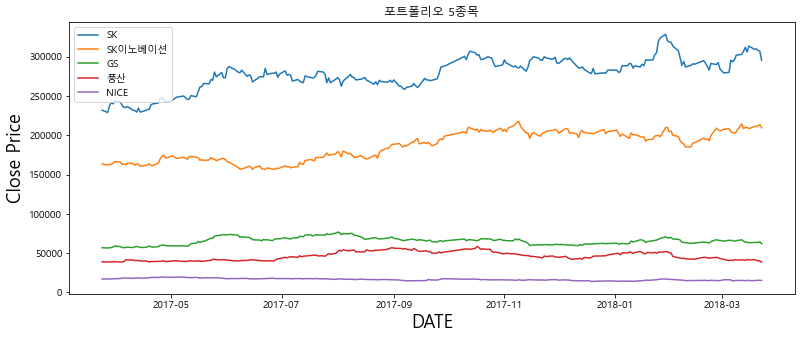

In [217]:
from matplotlib import pyplot as plt
제목 = '포트폴리오 5종목'
my_stocks = 종가
plt.figure(figsize=(13,5))

for stock in my_stocks.columns.values:
    plt.plot(my_stocks[stock],label=stock)

plt.title(제목)
plt.xlabel('DATE',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

## 재무계산하기

### 단순 하루 수익률

In [182]:
일별수익률 = 종가.pct_change()
일별수익률

,SK,SK이노베이션,GS,풍산,NICE
2017-03-24,NaN,NaN,NaN,NaN,NaN
2017-03-27,-0.012931,-0.009174,-0.008787,-0.007692,0.000000
2017-03-28,0.034934,0.006173,0.008865,-0.002584,0.002941
2017-03-29,0.021097,0.000000,0.000000,0.002591,0.008798
2017-03-30,-0.008264,0.009202,0.015817,0.007752,0.005814
...,...,...,...,...,...
2018-03-19,-0.012759,0.011990,0.007924,0.004843,-0.016556
2018-03-20,0.001616,0.002370,0.000000,-0.016867,0.033670
2018-03-21,-0.006452,0.002364,-0.001572,-0.015931,-0.006515
2018-03-22,-0.003247,0.007075,0.014173,-0.003736,0.000000


In [215]:
연간단순수익률 = np.sum(일별수익률.mean()*가중치)*250
연간단순수익률

0.13414733260741848

In [216]:
# np.sum(일별수익률.mean())*250

0.6707366630370923

In [214]:
처음 = 종가.iloc[0]
끝 = 종가.iloc[-1]
처음과끝 = pd.concat([처음,끝],axis=1)
연수익 = 처음과끝.transpose().pct_change()
(sum(연수익.iloc[1].tolist())/5)

0.10535743226355684

In [260]:
def 연간수익률(날짜,종목코드_list):   #종목코드_list 는 연도를 넣어서 해당연도로 선정된 종목코드_list입니다.
    # 날짜,종목코드_list,항목구하기 를 전의 함수에서 불러옵니다.
    날짜 =날짜 + str(12)  #12월재무제표라 12를 붙여준다.
    # 날짜
    
    #실적보고발표일 값 불러오기
    실적보고발표일 = 코스피재무제표[코스피재무제표['재무요소']=='실적보고발표일']
    실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111
    실적보고발표일['값'] = 실적보고발표일['값'].astype(int)
    실적보고발표일['값'] = 실적보고발표일['값'].astype(str)
    
    #실적보고발표종목의 마지막날짜 불러오기
    실적발표_list = []
    for col in 종목코드_list:
        발표일 = 실적보고발표일['값'][(실적보고발표일['날짜']== 날짜 ) & (실적보고발표일['종목코드']==col)]
        실적발표_list.extend(발표일)

    매수기준날짜 = max(실적발표_list)    # 선정된 종목 실적 발표일 중 마지막날  
    
    #연도와,재무요소에 맞춰서 선정된종목들중 시가총액을 기준으로 상위 5개를 발표일일 다음날에 맞춰서 불러오기
    #매수기준날짜 나중에 사용해야함!!!!!!!!!!!!!!!!!!!!!!!
    종목가격 = pd.DataFrame()
    for 종목 in 종목코드_list:
        종목 = 전체종목코스피시가총액[(전체종목코스피시가총액['Date']=='20170324') & (전체종목코스피시가총액['종목코드']== 종목)]
        종목가격 = pd.concat([종목가격,종목],axis=0)
    
    #포트폴리오 수익률 구하기전 최종 종목코드,이름,데이터프레임
    포트폴리오종목선정 = 종목가격.sort_values('시가총액',ascending=False)[:5]
    포트폴리오종목이름 = 포트폴리오종목선정['종목명'].tolist()
    포트폴리오종목코드 = 포트폴리오종목선정['종목코드'].tolist()  # 다섯개
    
    #동일가중방식 수익률 산정
    가중치 = np.array([0.2,0.2,0.2,0.2,0.2])  # 5종목이니까 자금의 20%씩
    
    #시작날짜와 1년뒤 날짜 설정 이것도 주식거래날에 맞춰서 다음에 함수수정해야해!!!!!!!!!!!!!!!!!!!!!!
    시작날짜 = '20170324' #매수기준날짜에서 다음주식거래날짜
    일년뒤날짜 = '20180323' #시작날짜에서 1년뒤 거래날짜
    
    #종가데이터만 불러서 선정된5개종목의 종가 데이터프레임화
    종가 = pd.DataFrame()
    for ticker in 포트폴리오종목코드:
        df = stock.get_market_ohlcv(시작날짜, 일년뒤날짜, ticker)
        종가 = pd.concat([종가,df['종가']],axis=1)
    종가.columns = 포트폴리오종목이름
    
    #종가데이터로 수익률 계산하기.
    
    일별수익률 = 종가.pct_change()
    연간단순수익률 = np.sum(일별수익률.mean()*가중치)*250
    
    return 매수기준날짜,포트폴리오종목이름,일별수익률,연간단순수익률
    

In [277]:
날짜, 종목코드_list, 항목구하기 = 삼대투자종목선정함수('2020')

C:\Users\713\AppData\Local\Temp/ipykernel_19392/755100897.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  당해연도['값'] = 당해연도['값'].astype(float)


In [278]:
연간수익률(날짜,종목코드_list)

C:\Users\713\AppData\Local\Temp/ipykernel_19392/3814444711.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  실적보고발표일['값'][실적보고발표일['값'].isna()]= 11111111
C:\AI\pythonProject\venv\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\713\AppData\Local\Temp/ipykernel_19392/3814444711.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

('20210322',
 ['오리온', 'KCC', '포스코대우', '현대홈쇼핑', '쿠쿠전자'],
                  오리온       KCC     포스코대우     현대홈쇼핑      쿠쿠전자
 2017-03-24       NaN       NaN       NaN       NaN       NaN
 2017-03-27  0.010516 -0.012659 -0.019694  0.051282  0.015147
 2017-03-28  0.005977  0.012821  0.026786 -0.012195 -0.007436
 2017-03-29 -0.008897 -0.004220  0.000000  0.008230 -0.026320
 2017-03-30  0.001491  0.000000 -0.013043  0.008163  0.003847
 ...              ...       ...       ...       ...       ...
 2018-03-19  0.005367 -0.005666 -0.026066 -0.009434 -0.002037
 2018-03-20 -0.001779 -0.011394  0.007299 -0.014286 -0.013265
 2018-03-21  0.008913  0.004323  0.026570  0.009662 -0.009307
 2018-03-22 -0.005300 -0.001435  0.056471 -0.004785 -0.013570
 2018-03-23 -0.039076 -0.017242 -0.006682 -0.004808 -0.026455
 
 [243 rows x 5 columns],
 -0.039690873188124594)

In [247]:
# 전체종목코스피시가총액.head()
